# Parameters

In [160]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

In [161]:
from numpy import sqrt

In [162]:
import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [167]:
#Parameters

Theta=-np.pi/2
Phi  =0

#Pulse parameter

Para_theta=np.pi/10

#Number of atoms

N=100000

#Coupling constant

gC=1

# Detuning frequency

DeltaC=0


# Frequency shift A

delta_A=0

# Frequency shift B

delta_B=0



# Decaying photonic mode

KapC= 15*np.sqrt(N)*gC

# Local decay 

gamma_local=  0


#Final time

t_final=10

# Hamiltonian parameters (in the spin-model limit)

In [168]:
chi=(gC**2)*DeltaC/( (KapC/2)**2 + DeltaC**2 +1e-10)
GammaC=KapC*(gC**2)/( (KapC/2)**2 + DeltaC**2 +1e-10)

N*GammaC*t_final

843.274042711568

In [165]:
print(chi,GammaC,gamma_local)

0.0 0.002666666666666666 0


In [166]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt
from numpy import sqrt
import time
from numba import jit
from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import time 
import itertools
from itertools import permutations
from numba import jit
from scipy.integrate import complex_ode
import time
import numpy as np
from scipy.integrate import odeint
from numba import jit
from numba import jit
from scipy import sparse
from numpy import sin, cos, exp
from scipy.sparse import identity
from numpy import transpose
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm
import scipy.special


In [114]:


def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    
    
    

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

## Description of operators

def dagger(A):
    return np.transpose(np.conjugate(A))




"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [115]:
pip install sdeint

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt

In [117]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [118]:
def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)

In [119]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
matrix_array.append(f2z)


f3z=np.zeros((4, 4),dtype=complex_)
f3z[3][3]=1

#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

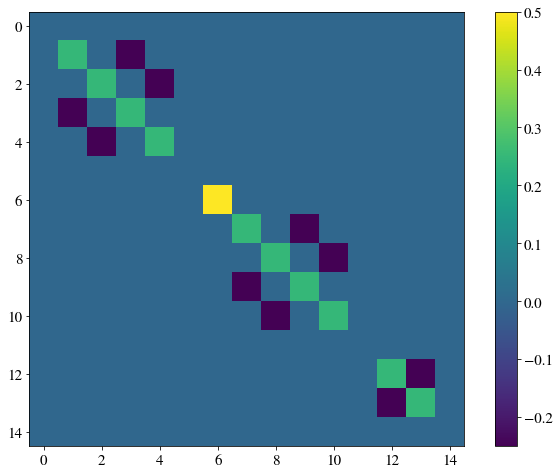

In [120]:
# Plot Covariance Matrix


import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.real(Cov_mat))
plt.colorbar()
plt.show()

In [121]:
sqrt3=np.sqrt(3)
sqrt2=np.sqrt(2)
coef_N=1

In [122]:

@jit

def fpulse(y, t):
    
    
    alpCx=y[15]
    alpCy=y[16]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    
    
    dalpCxdt = 0

    dalpCydt = 0

    Coef=N  
        
        
    ds10xdt = s30y+s21y/sqrt3
            
    ds20xdt = 0
    
    ds30xdt = s10y-s32y/sqrt3
    
    ds21xdt = s32y-s10y/sqrt3
    
    ds31xdt = 0

    ds32xdt = -s21y-s30y/sqrt3
   



    ds10ydt = -s30x+s21x/sqrt3
        
    ds20ydt = -(s0z-s2z)*sqrt2/sqrt3
    
    ds30ydt = -s10x+s32x/sqrt3
    
    ds21ydt = s32x-s10x/sqrt3
    
    ds31ydt = sqrt2*(N-s0z-2*s1z-s2z)
    
    ds32ydt = -s21x+s30x/sqrt3
    
        
        
                
    ds0zdt = s20y *sqrt2/sqrt3
    
    ds1zdt = s31y *sqrt2
            
    ds2zdt = -s20y *sqrt2/sqrt3
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpCxdt,dalpCydt]
    return coef_N*array(dzdt)
    

In [123]:
steps1=500000

tf=t_final
t_alt = np.linspace(0,Para_theta/coef_N+tf,steps1)



t_step=(Para_theta/coef_N+tf)/steps1

t_step


2.062831853071796e-05

In [124]:

@jit

def f(y, t):
    
    
    alpCx=y[15]
    alpCy=y[16]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    
    
    dalpCxdt = -DeltaC*alpCy-(KapC/2)*alpCx  +(gC/sqrt2)*( s31y+s20y/sqrt3 )

    dalpCydt = DeltaC*alpCx-(KapC/2)*alpCy   -(gC/sqrt2)*( s31x+s20x/sqrt3 )



    ds10xdt   = gC*alpCx*(s30y+s21y/sqrt3)-gC*alpCy*(s30x+s21x/sqrt3) +( (delta_B-delta_A)/2 )*s10y    #-(gamma_local)*s32x
            
    ds20xdt = -(sqrt2/sqrt3)*gC*alpCy* (s2z-s0z) - delta_A*s20y    #-(gamma_local/2)*s20x

    ds30xdt = gC*alpCx*(s10y-s32y/sqrt3)+gC*alpCy*(s10x-s32x/sqrt3) -( (delta_B+delta_A)/2 )*s30y   #-(gamma_local/2)*s30x

    ds21xdt = gC*alpCx*(s32y-s10y/sqrt3)-gC*alpCy*(s32x-s10x/sqrt3) -( (delta_B+delta_A)/2 )*s21y   #-(gamma_local/2)*s21x

    ds31xdt = gC*sqrt2 *alpCy* (s0z+2*s1z+s2z-N) - delta_B*s31y    #-(gamma_local/2)*s31x

    ds32xdt = gC*alpCx*(-s21y-s30y/sqrt3)+gC*alpCy*(s21x+s30x/sqrt3) + ( (delta_A-delta_B)/2 )*s32y    #-(gamma_local)*s32x



    ds10ydt = gC*alpCx*(-s30x+s21x/sqrt3)+gC*alpCy*(-s30y+s21y/sqrt3) + ( (delta_A-delta_B)/2 )*s10x   #-(gamma_local)*s32y
    
    ds20ydt = (sqrt2/sqrt3)*gC*alpCy* (s2z-s0z) + delta_A*s20x   #-(gamma_local/2)*s20y

    ds30ydt = gC*alpCx*(-s10x+s32x/sqrt3)+gC*alpCy*(s10y-s32y/sqrt3) + ( (delta_B+delta_A)/2 )*s30x  #-(gamma_local/2)*s30y

    ds21ydt = gC*alpCx*(s32x-s10x/sqrt3)+gC*alpCy*(s32y-s10y/sqrt3) + ( (delta_B+delta_A)/2 )*s21x   #-(gamma_local/2)*s21y

    ds31ydt = sqrt2*gC*alpCx* (N-s0z-2*s1z-s2z) + delta_B*s31x    #-(gamma_local/2)*s31y

    ds32ydt = gC*alpCx*(-s21x+s30x/sqrt3) + gC*alpCy*(s30y/sqrt3-s21y) + ( (delta_B-delta_A)/2 )*s32x  #-(gamma_local)*s32y
    
        
        
                
    ds0zdt =  gC*(sqrt2/sqrt3) *(alpCx* s20y - alpCy* s20x) #+ (gamma_local)*s2z
    
    ds1zdt =  gC*sqrt(2)*(alpCx* s31y - alpCy* s31x)       # + (gamma_local)*(N-s0z-s1z-s2z)
            
    ds2zdt = -gC*(sqrt2/sqrt3) *(alpCx* s20y - alpCy* s20x) #- (gamma_local)*s2z
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpCxdt,dalpCydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,17))
    Arr[0][-1]=1
    Arr[0][-2]=1
    
    return diag(Arr[0])


In [125]:
@jit

def random_vect(KapC=KapC):
    Hu=np.zeros((1,17))
    Hu[0][-1]=np.sqrt(KapC/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapC/4)*np.random.normal()
    
    return Hu



In [126]:
inv_frac=200

Major_index=int(steps1/inv_frac)
#New_column=zeros((steps1//Major_index, int(15*16/2)))
New_column=zeros((steps1//Major_index, int(30)))

# Stratonovich-Heun

In [127]:
Stochastic=1


@jit


def stratHeunImpI(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        
        
        
        Rand_vectn=np.sqrt(h)*random_vect(KapC=KapC)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        
        if tn<Para_theta/coef_N:
            
            fn     = fpulse(yn, tn)
            ybar   = yn + fn*h  + Stochastic*(Rand_vectn)
            fnbar  = fpulse(ybar, tnp1)
            y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn

        else:
          
            fn     = f(yn, tn)
            ybar   = yn + fn*h  + Stochastic*(Rand_vectn)
            fnbar  = f(ybar, tnp1)
            y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
        



    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    

    total_elements=3

    for k in range(Ns//Major_index):
        y_partial=y[k*Major_index]
        counter=1
        for ik_dex in range(1,total_elements):
            y_partial=y_partial+y[k*Major_index+ik_dex]
            counter=counter+1

        y_reduced[k]=y_partial/counter

    return y_reduced



@jit

def SDE_sol_SHI():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImpI(f, GG, y0, t_alt)

In [128]:
Stochastic=1

@jit

def stratHeunImp(f, G, y0, tspan, dW=None):
    r"""Use the Stratonovich Heun algorithm to integrate Stratonovich equation
    dy = f(y,t)dt + G(y,t) \circ dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      W. Rumelin (1982) Numerical Treatment of Stochastic Differential
         Equations
      R. Mannella (2002) Integration of Stochastic Differential Equations
         on a Computer
      K. Burrage, P. M. Burrage and T. Tian (2004) Numerical methods for strong
         solutions of stochastic differential equations: an overview
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))
    y[0] = y0;
    for n in range(0, Ns-1):
        
        
        
        Rand_vectn=np.sqrt(h)*random_vect(KapC=KapC)[0]
        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        
        if tn<Para_theta/coef_N:
            
            fn     = fpulse(yn, tn)
            ybar   = yn + fn*h  + Stochastic*(Rand_vectn)
            fnbar  = fpulse(ybar, tnp1)
            y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn

        else:
          
            fn     = f(yn, tn)
            ybar   = yn + fn*h  + Stochastic*(Rand_vectn)
            fnbar  = f(ybar, tnp1)
            y[n+1] = yn + 0.5*(fn + fnbar)*h  + Stochastic*Rand_vectn
 
    y_reduced=np.zeros((Ns//Major_index, d), dtype=type(y0[0]))
    
    for k in range(Ns//Major_index):
        y_reduced[k]=(y[k*Major_index]+ y[k*Major_index+1]  +y[k*Major_index+2]  )/3
    
    return y_reduced



@jit

def SDE_sol_SH():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return stratHeunImpI(f, GG, y0, t_alt)

In [129]:
SDE_sol_SH()

<ipython-input-128-1c9582eb6a95>:74: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "SDE_sol_SH" failed type inference due to: Unknown attribute 'multivariate_normal' of type Module(<module 'numpy.random' from '/usr/local/lib/python3.7/dist-packages/numpy/random/__init__.py'>)

File "<ipython-input-128-1c9582eb6a95>", line 81:
def SDE_sol_SH():
    <source elided>
    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
        ^

During: typing of get attribute at <ipython-input-128-1c9582eb6a95> (81)

File "<ipython-input-128-1c9582eb6a95>", line 81:
def SDE_sol_SH():
    <source elided>
    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
        ^

  @jit
<ipython-input-128-1c9582eb6a95>:74: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "SDE_sol_SH" failed type inference due to

array([[-7.07106950e+03,  6.55274004e+01, -3.85011204e+01, ...,
        -7.07412503e-04, -4.11195521e-01,  2.15402574e-01],
       [-7.06275684e+03,  6.55274004e+01, -3.92977356e+01, ...,
         2.67211408e+00,  2.14655484e+00,  4.56225173e+00],
       [-7.02943344e+03,  6.55274004e+01, -4.01546562e+01, ...,
         1.42148922e+01, -3.96451403e+00,  9.69972101e-01],
       ...,
       [-7.03123381e+03,  3.94638473e+01, -9.93425190e+00, ...,
        -2.26003600e+02,  3.95749044e-01, -6.23928520e-01],
       [-7.03568688e+03,  1.42026993e+01,  3.00574677e+01, ...,
        -2.21044070e+02,  2.77511241e-01,  5.58540166e-01],
       [-7.04155832e+03,  1.89865635e+01,  2.27258471e+01, ...,
        -2.13936499e+02,  2.16153299e-01, -7.22364807e-01]])

In [130]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde_SH(itera=itera,N=N):
    Results =SDE_sol_SH()
    counter=1
    for j in range(itera):
        Trayec=SDE_sol_SH()
        Results=add(Results,Trayec)
        counter=counter+1
        print(j)
    
    return Results/counter

In [131]:
import time
t0=time.time()

itera=80

Result_varTWA_Col_SDE_SH = averages_sde_SH(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-130-d60752a0437a>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sde_SH" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol_SH at 0x7f5245fafb90>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol_SH at 0x7f5245fafb90>))
During: typing of call at <ipython-input-130-d60752a0437a> (10)


File "<ipython-input-130-d60752a0437a>", line 10:
def averages_sde_SH(itera=itera,N=N):
    Results =SDE_sol_SH()
    ^

  @jit
<ipython-input-130-d60752a0437a>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sde_SH" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-130-d60752a0437a>", line 12:
def averages_sde_SH(itera=itera,N=N):
    <source elided>
    counter=1
    for j in range(itera):
    ^

  @jit
/usr/loca

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
225.00960326194763


# Mean-Field

In [132]:
Stochastic=0


@jit



def Mean_Field(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]


        if tn<Para_theta/coef_N:
            
            y[n+1] = yn + fpulse(yn, tn)*h 

        else:
          
            y[n+1] = yn + f(yn, tn)*h

    return y


@jit

def Mean_Field_sol():
    
    y0=list(N*np.real(Miu))+[0*random.normal(0, 0.5),0*random.normal(0, 0.5)]
    
    return Mean_Field(f, GG, y0, t_alt)

In [133]:
Mean_field_res=Mean_Field_sol()


<ipython-input-132-15ee7cda6240>:61: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Mean_Field_sol" failed type inference due to: No implementation of function Function(<function real at 0x7f5274300b90>) found for signature:
 
 >>> real(reflected list(complex128)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'np_real': File: numba/np/arraymath.py: Line 3287.
        With argument(s): '(reflected list(complex128)<iv=None>)':
       Rejected as the implementation raised a specific error:
         TypingError: Failed in nopython mode pipeline (step: nopython frontend)
       Unknown attribute 'real' of type reflected list(complex128)<iv=None>
       
       File "../usr/local/lib/python3.7/dist-packages/numba/np/arraymath.py", line 3290:
           def np_real_impl(a):
               return a.real
               ^
       
       During: typing of get attribute at 

In [134]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result


In [135]:
t_reduced=np.zeros((1,steps1//Major_index))


for j in range(steps1//Major_index):
    t_reduced[0][j]=t_alt[Major_index*j]
    
    #for k in range(Ns//Major_index):
    #    y_reduced[k]=y[k*Major_index]
    
time_alt=t_reduced[0]

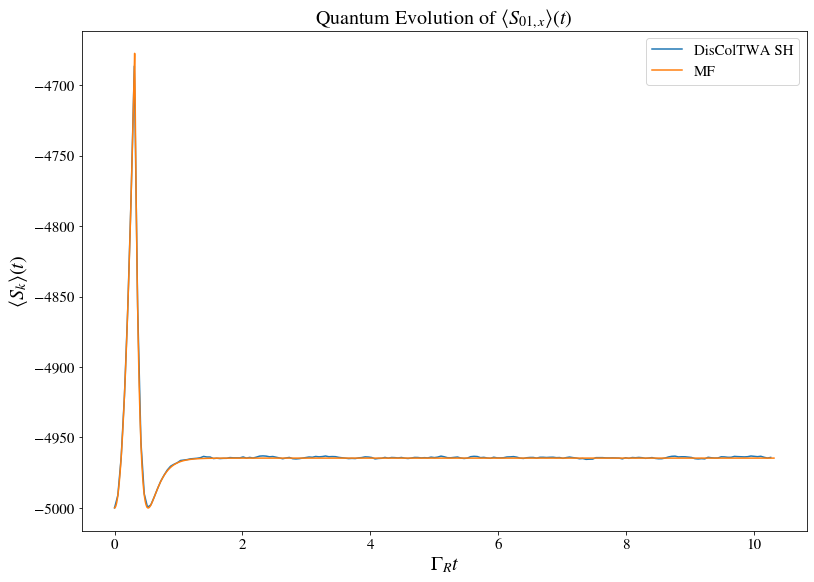

In [136]:


matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,time_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")
plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")



plt.legend()

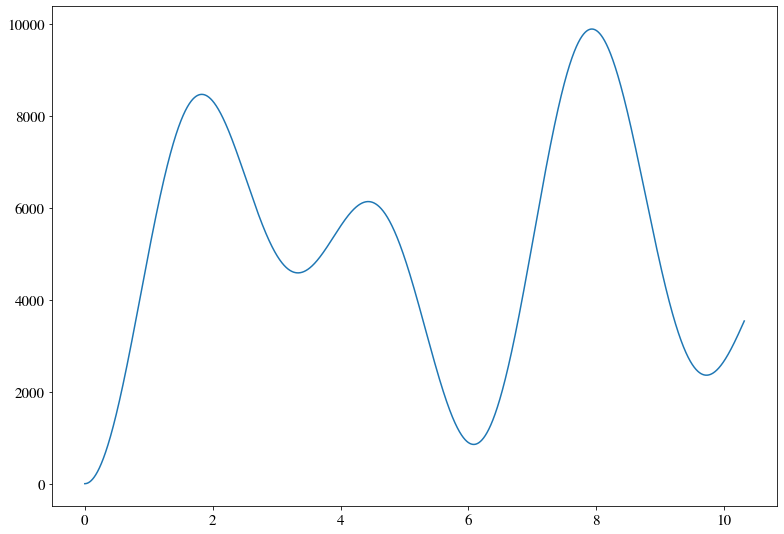

In [137]:
t_partit=partit(reductor,t_alt)


plt.plot(t_partit,N*(np.sin(t_partit)**2+np.sin(t_partit/np.sqrt(3))**2)/2,label="MF")



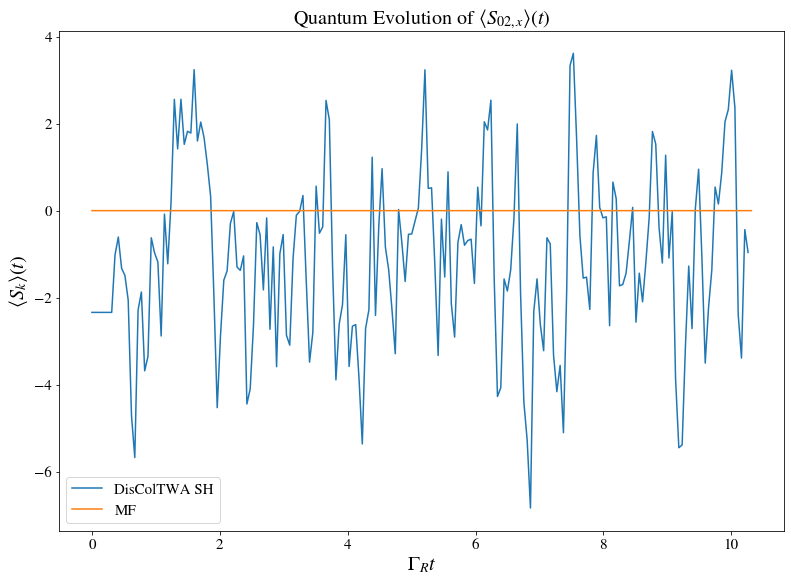

In [138]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,time_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

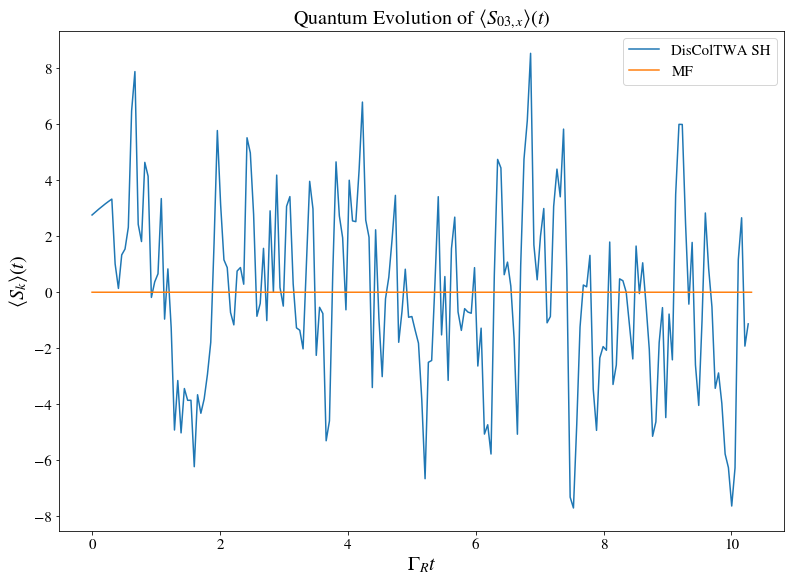

In [139]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")




plt.legend()

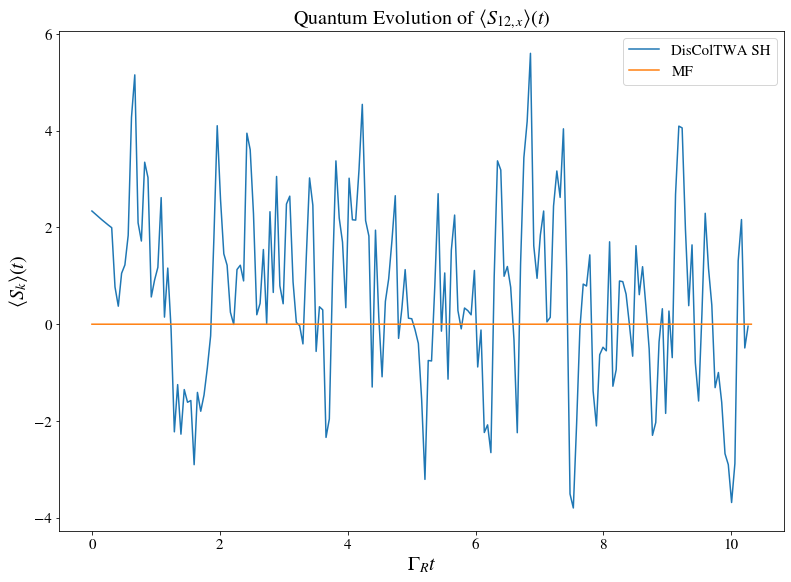

In [140]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=3

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

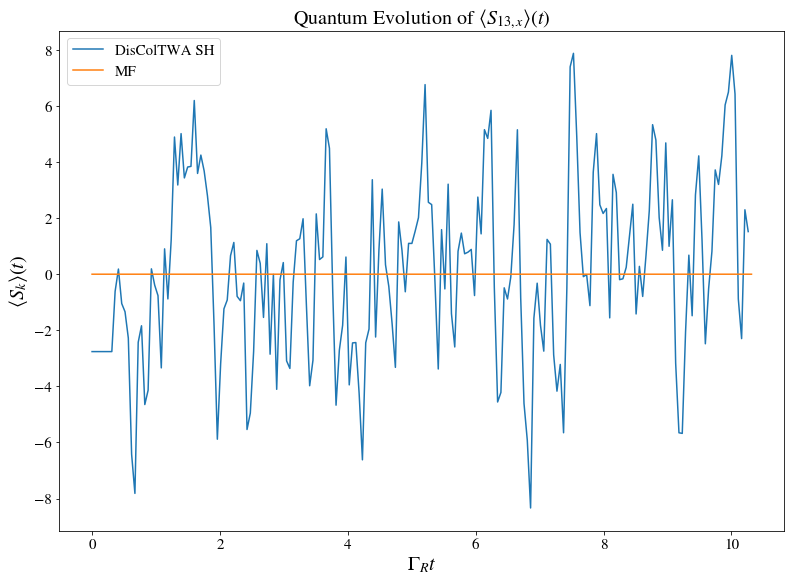

In [141]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=4

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")




plt.legend()

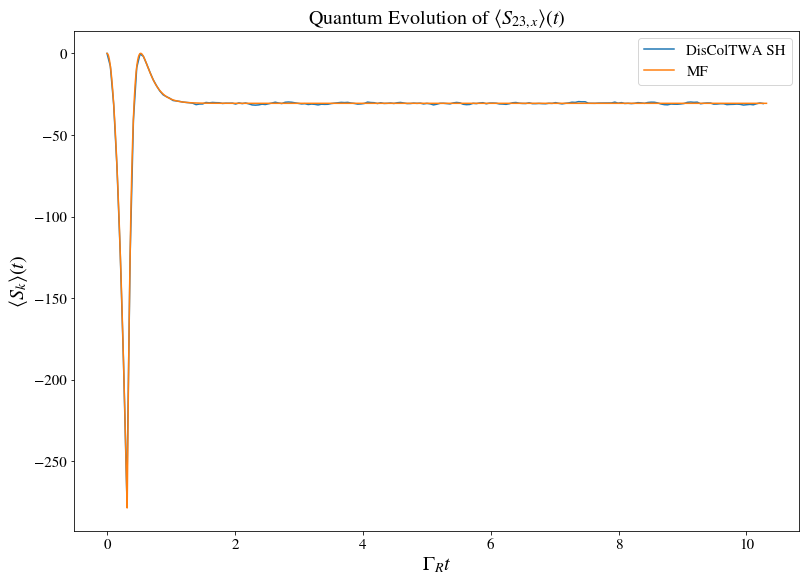

In [142]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=5

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index]/sqrt(2)),label="MF")





plt.legend()

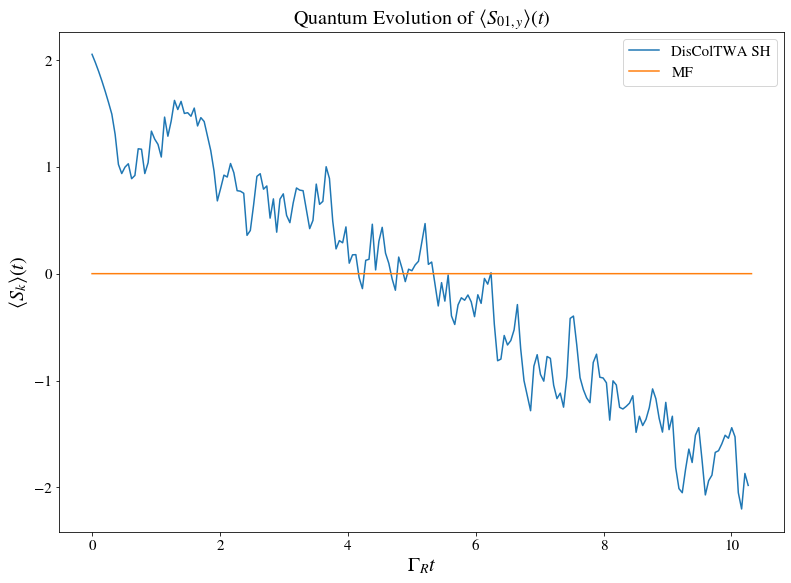

In [143]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

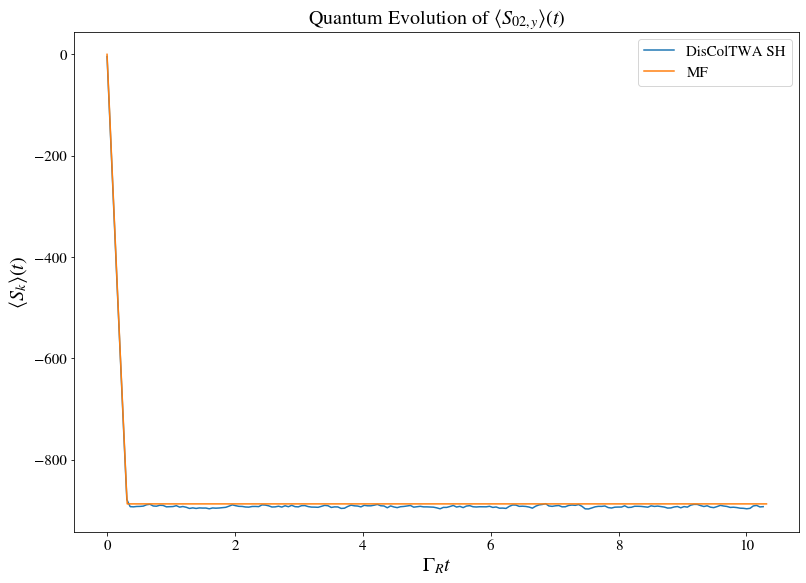

In [144]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

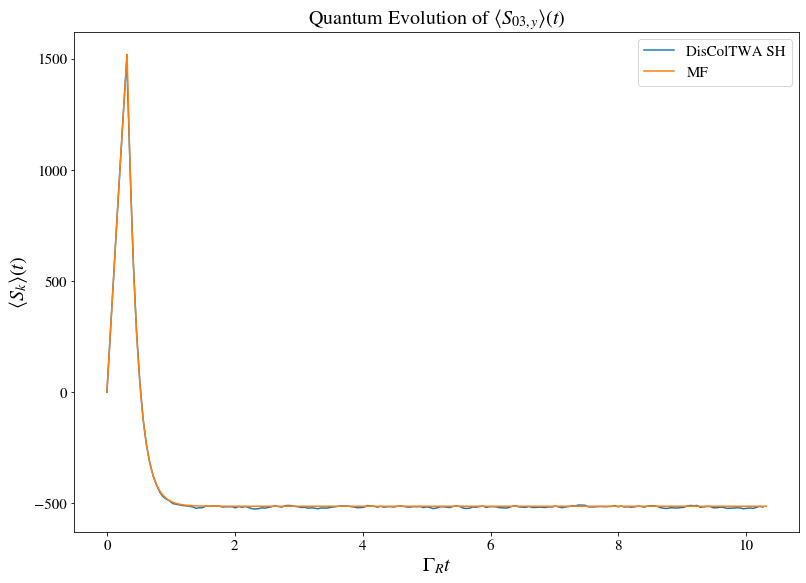

In [145]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

In [146]:
N

10000

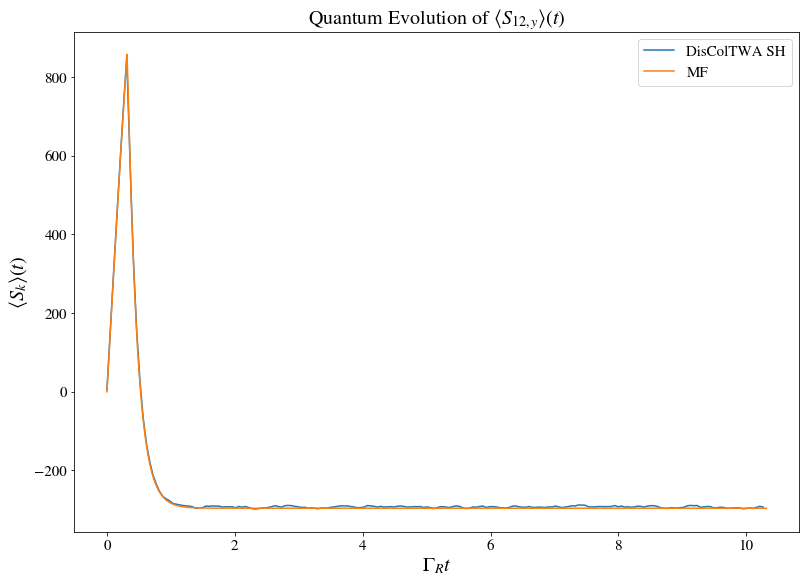

In [147]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=3

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")





plt.legend()

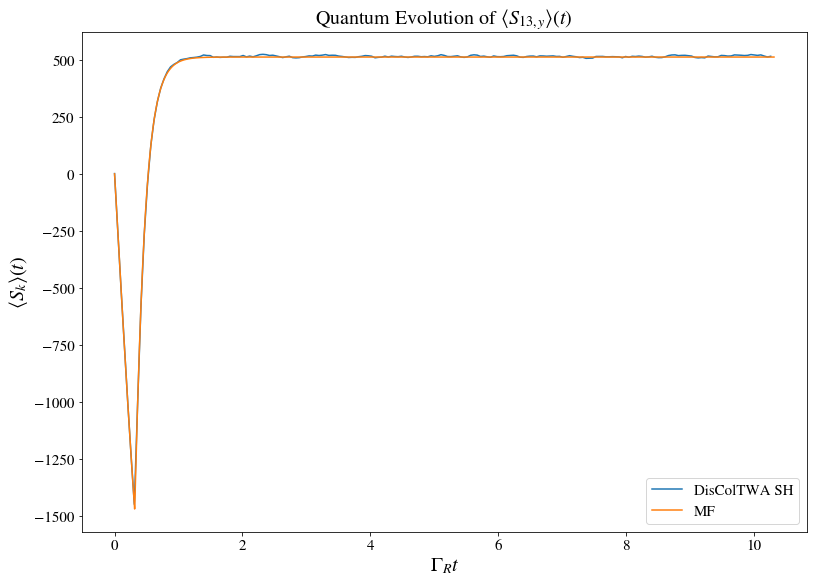

In [148]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=4

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")





plt.legend()

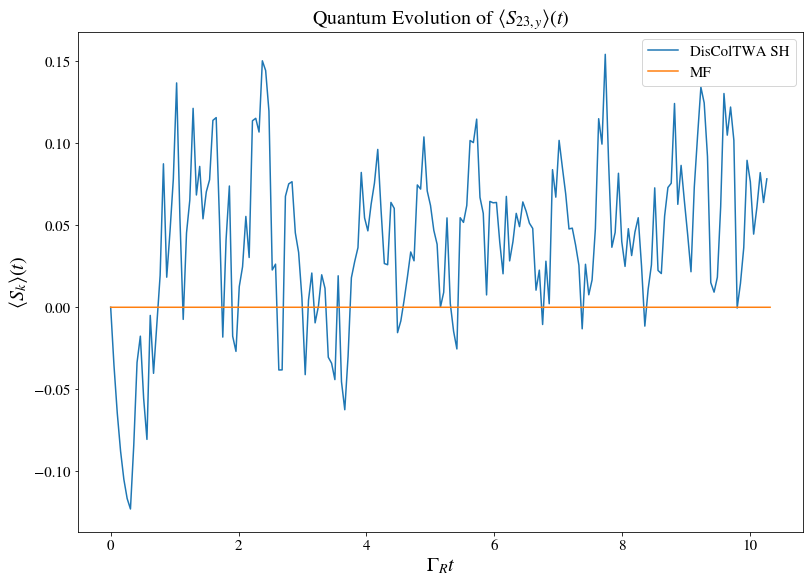

In [149]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=5

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+6]/sqrt(2)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+6]/sqrt(2)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+6]/sqrt(2)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+6]/sqrt(2)),label="MF")






plt.legend()

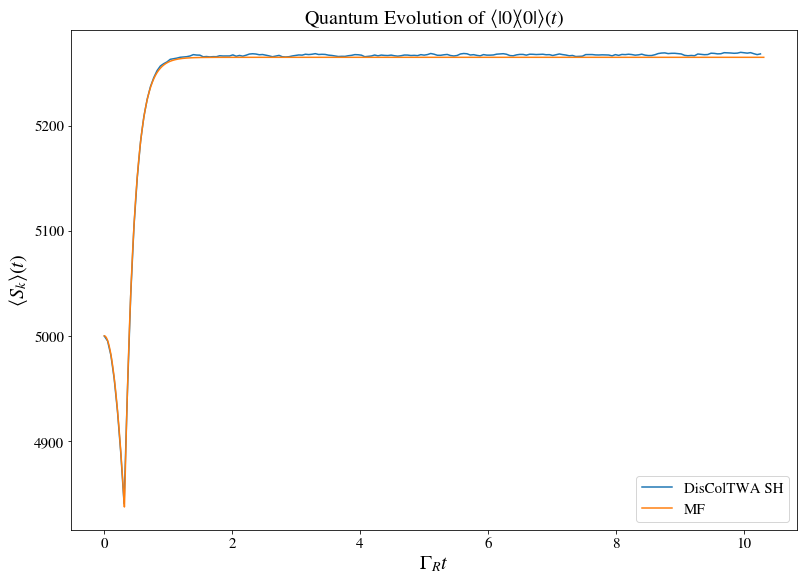

In [150]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 0 \rangle \!\! \langle0 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=0

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")




plt.legend()

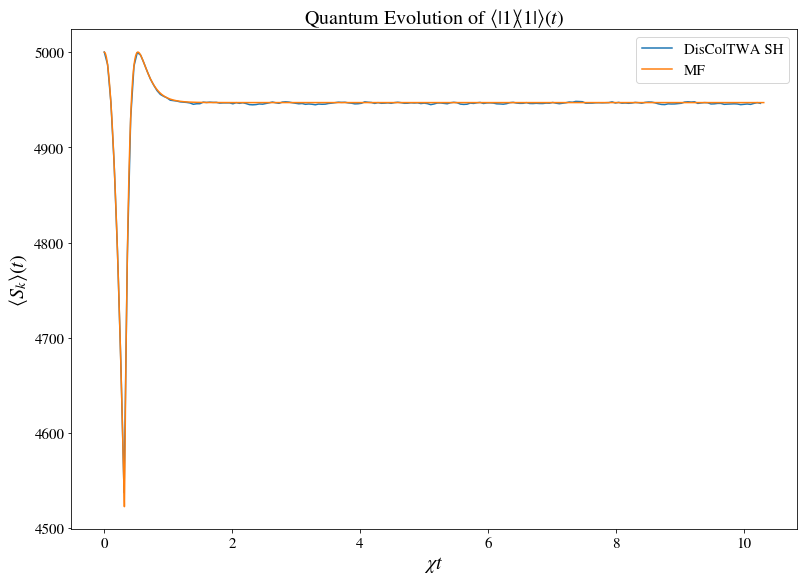

In [151]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 1 \rangle \!\! \langle 1 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\chi t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=1

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")







plt.legend()

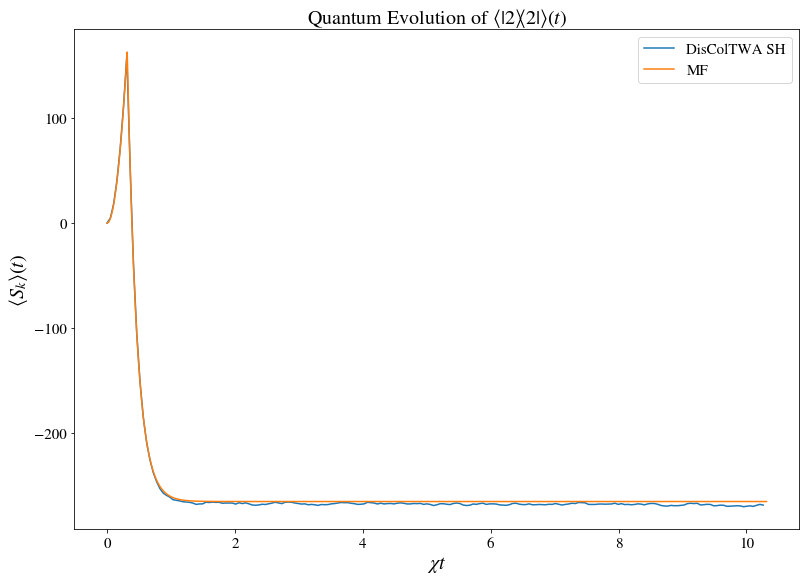

In [152]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 2 \rangle \!\! \langle 2 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\chi t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=2

label_size = 20

#plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE[:,index+12]/sqrt(1)),label="DisColTWA EM")


#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_var_Col_TWA[:,index+12]/sqrt(1)),label="TWA")


plt.plot(partit(reductor,t_alt),partit(reductor,Mean_field_res[:,index+12]/sqrt(1)),label="MF")






plt.legend()

In [153]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20



import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)


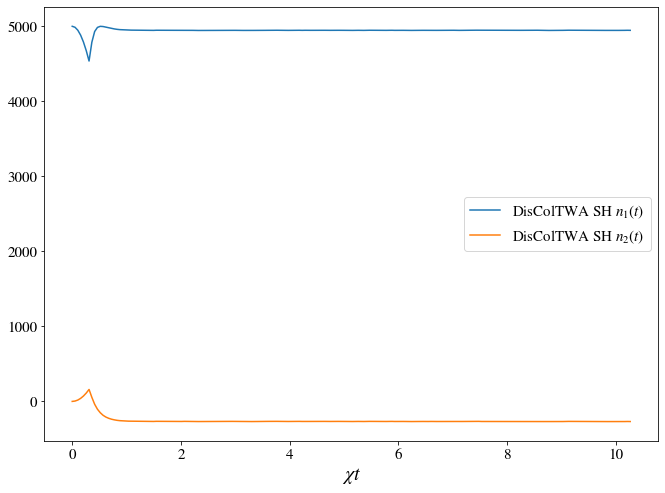

In [154]:
index=1
reductor=1


plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label='DisColTWA SH $n_1(t)$')
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label='DisColTWA SH $n_2(t)$')


plt.xlabel(r'$\chi t$', fontsize = label_size)

#plt.xscale('log')
#plt.yscale('log')

#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH 1")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label="DisColTWA SH 2")



plt.legend()

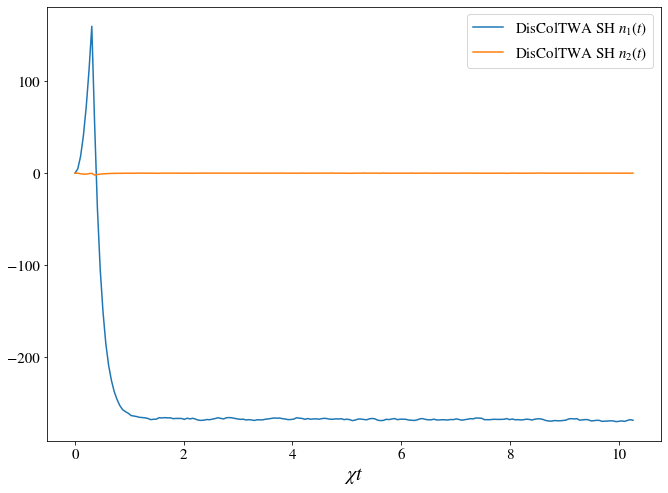

In [155]:
index=2
reductor=1


plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label='DisColTWA SH $n_1(t)$')
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label='DisColTWA SH $n_2(t)$')


plt.xlabel(r'$\chi t$', fontsize = label_size)

#plt.xscale('log')
#plt.yscale('log')

#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH 1")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label="DisColTWA SH 2")



plt.legend()

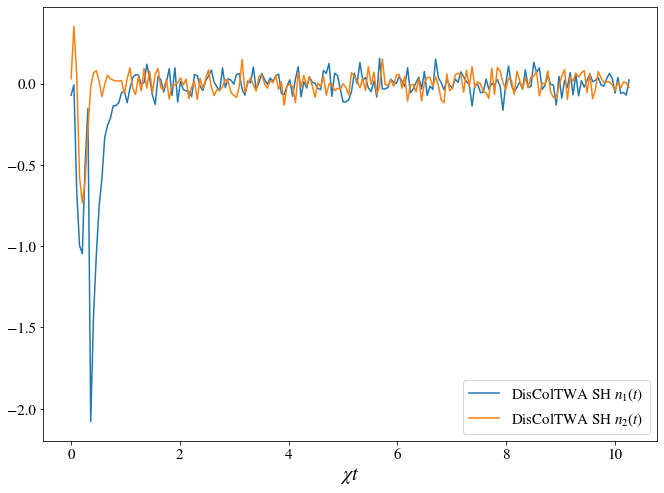

In [156]:
index=3
reductor=1


plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label='DisColTWA SH $n_1(t)$')
plt.plot(partit(reductor,time_alt),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label='DisColTWA SH $n_2(t)$')


plt.xlabel(r'$\chi t$', fontsize = label_size)

#plt.xscale('log')
#plt.yscale('log')

#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+12]/sqrt(1)),label="DisColTWA SH 1")
#plt.plot(partit(reductor,t_alt*chi),partit(reductor,Result_varTWA_Col_SDE_SH[:,index+13]/sqrt(1)),label="DisColTWA SH 2")



plt.legend()

# Excited State Population

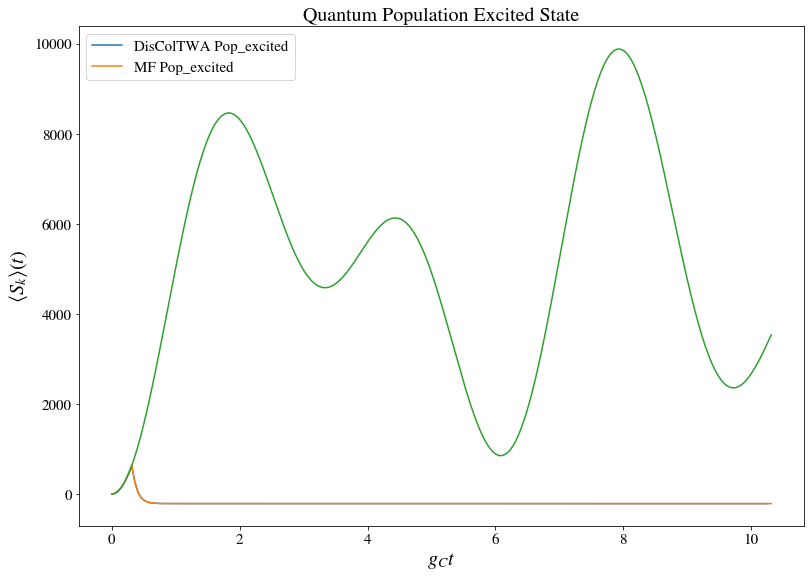

In [157]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Population Excited State', fontsize = label_size)
plt.xlabel(r'$g_Ct$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=1
index=0

label_size = 20


Exc_DTWA=N-Result_varTWA_Col_SDE_SH[:,index+12]-Result_varTWA_Col_SDE_SH[:,index+13]
Exc_MF  =(N-Mean_field_res[:,index+12]-Mean_field_res[:,index+13])

plt.plot(partit(reductor,time_alt),partit(reductor,Exc_DTWA/sqrt(1)),label="DisColTWA Pop_excited")


plt.plot(partit(reductor,t_alt),partit(reductor,Exc_MF/sqrt(1)),label="MF Pop_excited")



Par_ti=partit(reductor,t_alt)

Popul_max=N*((np.sin(Par_ti))**2+(np.sin(Par_ti/np.sqrt(3)))**2)*0.5
plt.plot(Par_ti,Popul_max)
plt.legend()

Here we will extract the initial excited population after the pulse and the steady-state of the excited population in function of the parameter $\eta$.

In [158]:
near=Para_theta/coef_N
pos=0


for j in range(len(partit(reductor,time_alt))):
    
    
    if np.abs(partit(reductor,time_alt)[j]-Para_theta/coef_N)<near:
        pos=j
        near=np.abs(partit(reductor,time_alt)[j]-Para_theta/coef_N)



# Initial excited population (post-pulse)


In_exc_pul=Exc_DTWA[pos]
SS_exc_pul=Exc_DTWA[-1]


print(Para_theta,In_exc_pul,SS_exc_pul)

0.3141592653589793 622.3557082148927 -214.36336444930748
